In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

### Data Set Characteristics:

##### Number of Instances:
 	
20640

##### Number of Attributes:
 	
8 numeric, predictive attributes and the target

##### Attribute Information:
 	
* MedInc median income in block
* HouseAge median house age in block
* AveRooms average number of rooms
* AveBedrms average number of bedrooms
* Population block population
* AveOccup average house occupancy
* Latitude house block latitude
* Longitude house block longitude

#### Target

The target variable is the median house value in units of 100,000 for California districts.

#### Documentation 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#examples-using-sklearn-datasets-fetch-california-housing

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape

(11610, 8)

![](Seq_api.png "Title")

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
# keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['mae'])

C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [12]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 1.8866 - mae: 0.9900 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6577 - mae: 0.6042 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - mae: 0.5618 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - mae: 0.5398 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - mae: 0.5237 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - mae: 0.5113 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4854 - mae: 0.5010 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [13]:
mae_test = model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 1ms/step - loss: 0.3942 - mae: 0.4502


In [14]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577126979827881,
  0.593418538570404,
  0.5557191371917725,
  0.5271905064582825,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779937505722046,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.42605164647102356,
  0.42017653584480286,
  0.41549986600875854,
  0.41116511821746826,
  0.4077068567276001,
  0.40395283699035645,
  0.4004494547843933,
  0.39796027541160583],
 'mae': [0.9900256991386414,
  0.6041509509086609,
  0.5618005990982056,
  0.5398454070091248,
  0.5237293243408203,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.4797375202178955,
  0.4744163453578949,
  0.4703480303287506,
  0.46740883588790894,
  0.4636021554470062,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.4545365273952484,
  0.4521064758300781,
  0.45083147287368774],
 'val_loss': [0.7126054763793945,
  0.6880088448524475,
  0.5803285837173462,
  0.516608536243

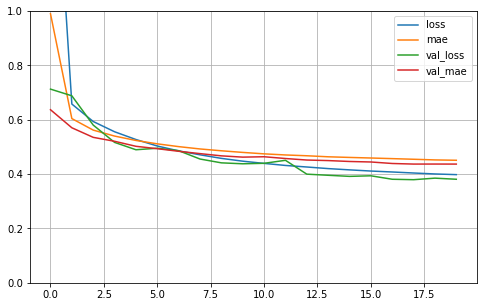

In [15]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [16]:
X_new = X_test[:3]

In [17]:
y_pred = model.predict(X_new)
print (y_pred)
print(y_test[:3])

[[0.53287673]
 [1.8915396 ]
 [3.4040868 ]]
[0.477   0.458   5.00001]


In [18]:
del model

In [20]:
keras.backend.clear_session()

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

![](Functional.JPG "Title")

In [21]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [23]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['mae'])

C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [24]:
model_history = model.fit(X_train, y_train, epochs=80, validation_data=(X_valid, y_valid))

Epoch 1/80
363/363 [==============================] - 2s 3ms/step - loss: 1.6920 - mae: 0.8893 - val_loss: 0.8798 - val_mae: 0.6026
Epoch 2/80
363/363 [==============================] - 1s 2ms/step - loss: 0.6836 - mae: 0.5994 - val_loss: 0.6420 - val_mae: 0.5764
Epoch 3/80
363/363 [==============================] - 1s 2ms/step - loss: 0.6265 - mae: 0.5775 - val_loss: 0.5891 - val_mae: 0.5503
Epoch 4/80
363/363 [==============================] - 1s 2ms/step - loss: 0.5877 - mae: 0.5581 - val_loss: 0.5455 - val_mae: 0.5343
Epoch 5/80
363/363 [==============================] - 1s 2ms/step - loss: 0.5566 - mae: 0.5421 - val_loss: 0.5409 - val_mae: 0.5202
Epoch 6/80
363/363 [==============================] - 1s 2ms/step - loss: 0.5312 - mae: 0.5298 - val_loss: 0.4903 - val_mae: 0.5046
Epoch 7/80
363/363 [==============================] - 1s 2ms/step - loss: 0.5108 - mae: 0.5186 - val_loss: 0.4728 - val_mae: 0.4962
Epoch 8/80
363/363 [==============================] - 1s 2ms/step - loss: 0.

363/363 [==============================] - 1s 2ms/step - loss: 0.3556 - mae: 0.4225 - val_loss: 0.3695 - val_mae: 0.4167
Epoch 63/80
363/363 [==============================] - 1s 2ms/step - loss: 0.3543 - mae: 0.4214 - val_loss: 0.3630 - val_mae: 0.4180
Epoch 64/80
363/363 [==============================] - 1s 2ms/step - loss: 0.3544 - mae: 0.4217 - val_loss: 0.3433 - val_mae: 0.4145
Epoch 65/80
363/363 [==============================] - 1s 2ms/step - loss: 0.3537 - mae: 0.4213 - val_loss: 0.3548 - val_mae: 0.4143
Epoch 66/80
363/363 [==============================] - 1s 2ms/step - loss: 0.3530 - mae: 0.4206 - val_loss: 0.3570 - val_mae: 0.4142
Epoch 67/80
363/363 [==============================] - 1s 2ms/step - loss: 0.3524 - mae: 0.4202 - val_loss: 0.3722 - val_mae: 0.4162
Epoch 68/80
363/363 [==============================] - 1s 2ms/step - loss: 0.3520 - mae: 0.4198 - val_loss: 0.3612 - val_mae: 0.4137
Epoch 69/80
363/363 [==============================] - 1s 2ms/step - loss: 0.3515

In [25]:
mae_test = model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 1ms/step - loss: 0.3453 - mae: 0.4147


In [26]:
model_history.history

{'loss': [1.6920058727264404,
  0.6836402416229248,
  0.626488208770752,
  0.5877465605735779,
  0.5565561056137085,
  0.5311980247497559,
  0.5107864141464233,
  0.4951668083667755,
  0.4802228510379791,
  0.4684668779373169,
  0.45896390080451965,
  0.45022013783454895,
  0.4432655870914459,
  0.4363251030445099,
  0.4306240975856781,
  0.42534440755844116,
  0.4212935268878937,
  0.41681814193725586,
  0.4126456081867218,
  0.4095860719680786,
  0.40596330165863037,
  0.4029441177845001,
  0.4000454246997833,
  0.3971883952617645,
  0.3946213722229004,
  0.39249086380004883,
  0.3904934525489807,
  0.38845276832580566,
  0.3867104947566986,
  0.38484394550323486,
  0.38295263051986694,
  0.3815838396549225,
  0.38052698969841003,
  0.3787004351615906,
  0.3775610029697418,
  0.3762996792793274,
  0.3750821352005005,
  0.3740888237953186,
  0.37281912565231323,
  0.37164339423179626,
  0.37105101346969604,
  0.37027257680892944,
  0.36904579401016235,
  0.3680413067340851,
  0.367731

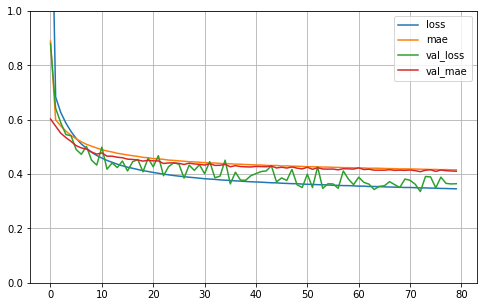

In [27]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [28]:
%pwd

'C:\\Users\\User\\Desktop\\internshala deep learnig\\ANN\\Python_codes'

# Saving and Restoring

In [29]:
model.save("my_Func_model.h5")

In [30]:
%pwd

'C:\\Users\\User\\Desktop\\internshala deep learnig\\ANN\\Python_codes'

In [31]:
%cd C:\\Users\\pukhr

[WinError 2] The system cannot find the file specified: 'C:\\\\Users\\\\pukhr'
C:\Users\User\Desktop\internshala deep learnig\ANN\Python_codes


In [32]:
del model

In [33]:
keras.backend.clear_session()

In [34]:
model = keras.models.load_model("my_Func_model.h5")

In [35]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [36]:
y_pred = model.predict(X_new)
print (y_pred)

[[0.7182212]
 [1.6819828]
 [4.1708364]]


# Using Callbacks during Training

In [37]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [38]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [39]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

C:\Users\User\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [40]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [41]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - ETA: 0s - loss: 0.559 - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0

In [42]:
del model
keras.backend.clear_session()

In [43]:
model = keras.models.load_model("Model-10.h5")

In [44]:
mse_test = model.evaluate(X_test, y_test,batch_size=5160)

1/1 [==============================] - 0s 220ms/step - loss: 0.4382


In [45]:
print (mse_test)

0.4382285475730896


In [46]:
model.metrics_names

['loss']

In [47]:
y_pred = model.predict(X_test)

In [48]:
y_diff=y_pred-y_test

In [49]:
y_pred.shape

(5160, 1)

In [50]:
mse = (y_diff^2)

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### Best Model Only

In [51]:
del model
keras.backend.clear_session()

In [52]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [53]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [54]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [55]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 5s 2ms/step - loss: 1.4581 - val_loss: 0.7883
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7368 - val_loss: 0.7306
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6516 - val_loss: 0.6501
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5951 - val_loss: 0.5551
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5536 - val_loss: 0.5025
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5199 - val_loss: 0.4728
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4940 - val_loss: 0.4497
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4730 - val_loss: 0.4359
Epoch 9/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4563 - val_loss: 0.4267
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4431 - val_loss: 0.4224

In [56]:
model = keras.models.load_model("Best_Model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4366


### Best Model Only

In [57]:
del model
keras.backend.clear_session()

In [58]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [59]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [60]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5", save_best_only=True)

In [61]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

#     patience: Number of epochs with no improvement after which training will be stopped.

In [62]:
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 2ms/step - loss: 2.5780 - val_loss: 2.2266
Epoch 2/200
363/363 [==============================] - 1s 2ms/step - loss: 1.0896 - val_loss: 0.9287
Epoch 3/200
363/363 [==============================] - 1s 3ms/step - loss: 0.8430 - val_loss: 0.9400
Epoch 4/200
363/363 [==============================] - 1s 2ms/step - loss: 0.7673 - val_loss: 0.7490
Epoch 5/200
363/363 [==============================] - 1s 2ms/step - loss: 0.7194 - val_loss: 0.6682
Epoch 6/200
363/363 [==============================] - 1s 3ms/step - loss: 0.6799 - val_loss: 0.6534
Epoch 7/200
363/363 [==============================] - 1s 3ms/step - loss: 0.6466 - val_loss: 0.6407
Epoch 8/200
363/363 [==============================] - 1s 3ms/step - loss: 0.6173 - val_loss: 0.5704
Epoch 9/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5894 - val_loss: 0.5552
Epoch 10/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5645 - val_lo

In [64]:
model = keras.models.load_model("early_stop_model.h5")
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3481
